<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 인식하기

## 기본 프레임 : No CNN

In [38]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [22]:
# MNIST 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [24]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

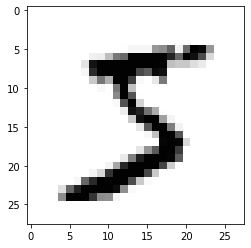

In [25]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [27]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [28]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [29]:
# 모델 정의
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
# Callback 설정
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [34]:
# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.14747, saving model to ./model/01-0.1475.hdf5

Epoch 2: val_loss improved from 0.14747 to 0.10506, saving model to ./model/02-0.1051.hdf5

Epoch 3: val_loss improved from 0.10506 to 0.08683, saving model to ./model/03-0.0868.hdf5

Epoch 4: val_loss improved from 0.08683 to 0.07469, saving model to ./model/04-0.0747.hdf5

Epoch 5: val_loss improved from 0.07469 to 0.07089, saving model to ./model/05-0.0709.hdf5

Epoch 6: val_loss improved from 0.07089 to 0.06895, saving model to ./model/06-0.0690.hdf5

Epoch 7: val_loss improved from 0.06895 to 0.06191, saving model to ./model/07-0.0619.hdf5

Epoch 8: val_loss improved from 0.06191 to 0.06127, saving model to ./model/08-0.0613.hdf5

Epoch 9: val_loss did not improve from 0.06127

Epoch 10: val_loss did not improve from 0.06127

Epoch 11: val_loss did not improve from 0.06127

Epoch 12: val_loss did not improve from 0.06127

Epoch 13: val_loss did not improve from 0.06127

Epoch 14: val_loss impr

In [35]:
# 테스트 정확도 출력
print(f'Test Accuracy: {model.evaluate(X_test, y_test)[1]:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9835
Test Accuracy: 0.9835


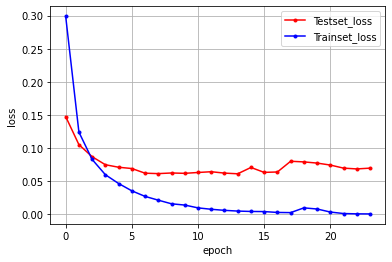

In [36]:
# 테스트셋 오차
y_vloss = history.history['val_loss']
# 학습셋 오차
y_loss = history.history['loss']

# 그래프 그리기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 컨볼루션 신경망 적용

In [43]:
# MNIST 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [44]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Callback 설정
model_dir = './model_CNN/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = "./model_CNN/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [47]:
# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.11262, saving model to ./model_CNN/01-0.1126.hdf5

Epoch 2: val_loss improved from 0.11262 to 0.06918, saving model to ./model_CNN/02-0.0692.hdf5

Epoch 3: val_loss improved from 0.06918 to 0.05756, saving model to ./model_CNN/03-0.0576.hdf5

Epoch 4: val_loss improved from 0.05756 to 0.05090, saving model to ./model_CNN/04-0.0509.hdf5

Epoch 5: val_loss improved from 0.05090 to 0.04713, saving model to ./model_CNN/05-0.0471.hdf5

Epoch 6: val_loss improved from 0.04713 to 0.04275, saving model to ./model_CNN/06-0.0428.hdf5

Epoch 7: val_loss improved from 0.04275 to 0.04209, saving model to ./model_CNN/07-0.0421.hdf5

Epoch 8: val_loss improved from 0.04209 to 0.03996, saving model to ./model_CNN/08-0.0400.hdf5

Epoch 9: val_loss improved from 0.03996 to 0.03967, saving model to ./model_CNN/09-0.0397.hdf5

Epoch 10: val_loss improved from 0.03967 to 0.03580, saving model to ./model_CNN/10-0.0358.hdf5

Epoch 11: val_loss did not improve from 0.

In [48]:
# 테스트 정확도 출력
print(f'Test Accuracy: {model.evaluate(X_test, y_test)[1]:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9896
Test Accuracy: 0.9896


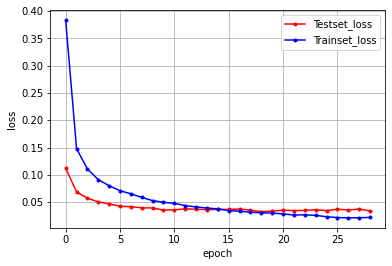

In [49]:
# 테스트셋 오차
y_vloss = history.history['val_loss']
# 학습셋 오차
y_loss = history.history['loss']

# 그래프 그리기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()